## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.regularizers import l1,l2
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units = 10, num_neurons = [512,256,128], l1_ = False,
              l2_ = False, l1_ratio = 0, l2_ratio = 0, pre_active = True, dropout_ratio = 0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate (num_neurons):
        if i ==0:
            if l1_:
                x = keras.layers.Dense(units = n_units, name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l1(l1_ratio))(input_layer)
                if pre_active:
                    x = BatchNormalization()(x)
                    x = Activation('relu')(x)
                    x = keras.layers.Dropout(dropout_ratio)(x)
                else:
                    x = Activation('relu')(x)
                    x = BatchNormalization()(x)
                    x = keras.layers.Dropout(dropout_ratio)(x)
            else:
                x = keras.layers.Dense(units = n_units, name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l2(l2_ratio))(input_layer)
                if pre_active:
                    x = BatchNormalization()(x)
                    x = Activation('relu')(x)
                    x = keras.layers.Dropout(dropout_ratio)(x)
                else:
                    x = Activation('relu')(x)
                    x = BatchNormalization()(x)
                    x = keras.layers.Dropout(dropout_ratio)(x)
        else:
            if l1_:
                x = keras.layers.Dense(units = n_units, name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l1(l1_ratio))(x)
                if pre_active:
                    x = BatchNormalization()(x)
                    x = Activation('relu')(x)
                    x = keras.layers.Dropout(dropout_ratio)(x)
                else:
                    x = Activation('relu')(x)
                    x = BatchNormalization()(x)
                    x = keras.layers.Dropout(dropout_ratio)(x)
            else:
                x = keras.layers.Dense(units = n_units, name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l2(l2_ratio))(input_layer)
                if pre_active:
                    x = BatchNormalization()(x)
                    x = Activation('relu')(x)
                    x = keras.layers.Dropout(dropout_ratio)(x)
                else:
                    x = Activation('relu')(x)
                    x = BatchNormalization()(x)
                    x = keras.layers.Dropout(dropout_ratio)(x)
    out = keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
PRE_ACTIVE = [False, True]
MOMENTUM = 0.95
L1_RATIO = [1e-2,1e-5]
L2_RATIO = [1e-2,1e-5]

In [16]:
import itertools
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, (pre_act, l1_ratio) in enumerate(itertools.product(PRE_ACTIVE,L1_RATIO)):
    keras.backend.clear_session()
    print("Pre activatation of batch normalization is %s and l1 ratio is %i in %ith simulation" %(pre_act,l1_ratio,i))
    model = build_mlp(input_shape=x_train.shape[1:], pre_active=pre_act, l1_= True, l1_ratio = l1_ratio)
    model.summary()
    opt = keras.optimizers.Adam(lr = LEARNING_RATE)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = opt)
    
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data= (x_test,y_test),
             shuffle = True)
    
    name_tag = ("pre_act %s, l1=%.6f" %(pre_act,l1_ratio))
    results[name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Pre activatation of batch normalization is False and l1 ratio is 0 in 0th simulation
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________

In [17]:
for i, (pre_act, l2_ratio) in enumerate(itertools.product(PRE_ACTIVE,L2_RATIO)):
    keras.backend.clear_session()
    print("Pre activatation of batch normalization is %s and l2 ratio is %i in %ith simulation" %(pre_act,l2_ratio,i))
    model = build_mlp(input_shape=x_train.shape[1:], pre_active=pre_act, l2_= True, l2_ratio = l2_ratio)
    model.summary()
    opt = keras.optimizers.Adam(lr = LEARNING_RATE)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = opt)
    
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data= (x_test,y_test),
             shuffle = True)
    
    name_tag = ("pre_act %s, l2=%.6f" %(pre_act,l2_ratio))
    results[name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Pre activatation of batch normalization is False and l2 ratio is 0 in 0th simulation
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               393344    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 395,146
Trainable params: 39

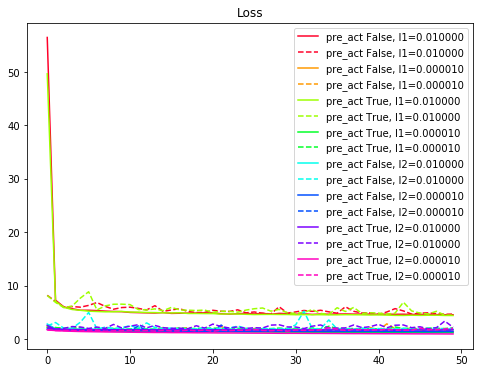

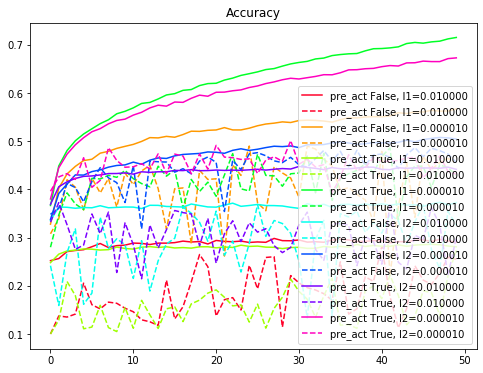

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors
num_colors = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
norm = colors.Normalize(vmin = 0, vmax = num_colors -1)
scalar_map = mplcm.ScalarMappable(norm = norm, cmap = cm)
color_bar = [scalar_map.to_rgba(i) for i in range(num_colors)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()